In [1]:
####   
#Fz Einfluss auf Reifenmodelle
####

import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.insert(0, os.path.abspath('../model'))

import Pacejka52 as pa52
import fiala as fi
import Brush as br
import TMeasy as tm
import Dugoff as du
import Pacejka52_glSA as pa52gl
import Pacejka52_params_comp as pa52pa

sys.path.insert(0, os.path.abspath('../model/parameter'))
import Pacejka_Params_Indy as pa
import Params_fit_at_Pa52 as pam

i=500
Sx = np.linspace(0,1,i)
Sy = np.linspace(0,0.3,i)
Fz0 = 3114
IA = 0

iter = 500 #
Fz = np.linspace(1500,5000,iter)


4665.109756333515
4664.16757889698
4663.925880835989


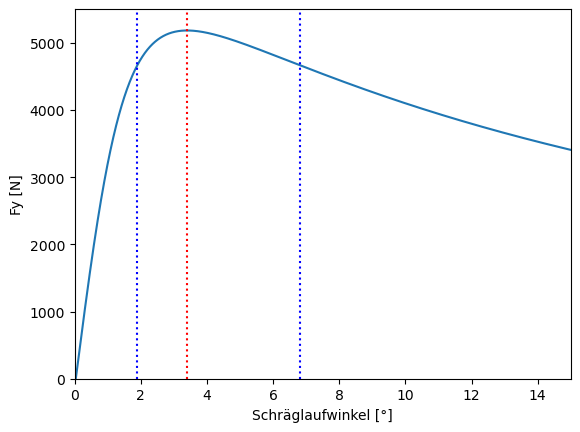

In [2]:
#Kriterien SA

Fz = 3000
Sy = np.linspace(0,0.3,10000)
Sy1 = np.linspace(0,15,10000)
Fy = pa52.Pacejka52_long(Fz,Sy,IA,Fz0)[0]
Fmax = np.max(Fy)

FmaxS = np.argmax(Fy) / 10000 * 15
left = 0
for j in range(0,len(Fy)):
    if Fy[j] < Fmax*0.9:
        left +=1
    else:
        break
right = 0
for j in range(left+1,len(Fy)):
    if Fy[j] > Fmax*0.9:
        right +=1
    else:
        break

l = left/10000 *15
r = (left + right)/10000 *15
print(Fy[left])
print(Fy[(left + right)])
print(Fmax * 0.9)
plt.plot(Sy1,Fy)
plt.xlim(0,15)
plt.ylim(0,5500)
plt.xlabel('Schräglaufwinkel [°]')
plt.ylabel('Fy [N]')


plt.axvline(x = FmaxS, color='r', linestyle='dotted')
plt.axvline(x = l, color='b', linestyle='dotted')
plt.axvline(x = r, color='b', linestyle='dotted')

Text(0.5, 0, 'Schlupf [%]')

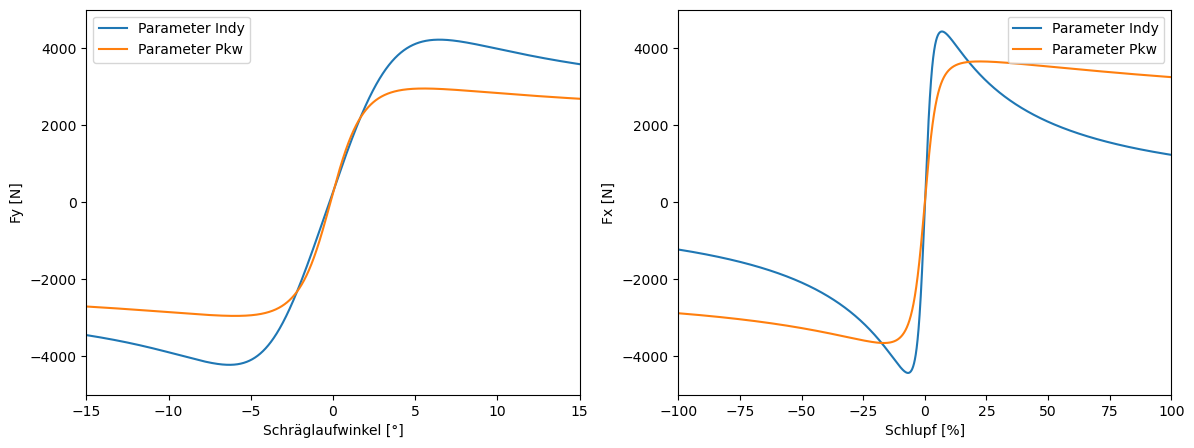

In [18]:
#Vergleich Rennreifen - Straßenreifen
Fz = 2500
Sy = np.linspace(-0.3,0.3,10000)
Sy_plot = np.linspace(-15,15,10000)
IA = 0
Fz0 = 3114
Fy_indy = pa52pa.Pacejka52_lat(Fz,Sy,IA,Fz0,'INDY')[0]
Fy_pkw = pa52pa.Pacejka52_lat(Fz,Sy,IA,Fz0,'PKW')[0]


fig,ax = plt.subplots(1,2, figsize = [14,5])

ax[0].plot(Sy_plot,Fy_indy, label = "Parameter Indy")
ax[0].plot(Sy_plot,Fy_pkw, label = "Parameter Pkw")
ax[0].set_ylim(-5000,5000)
ax[0].set_xlim(-15,15)
ax[0].legend()
ax[0].set_ylabel('Fy [N]')
ax[0].set_xlabel('Schräglaufwinkel [°]')

Sx = np.linspace(-1,1,10000)
Sx_plot = np.linspace(-100,100,10000)
Fx_indy = pa52pa.Pacejka52_long(Fz,Sx,IA,Fz0,'INDY')[0]
Fx_pkw = pa52pa.Pacejka52_long(Fz,Sx,IA,Fz0,'PKW')[0]

ax[1].plot(Sx_plot,Fx_indy, label = "Parameter Indy")
ax[1].plot(Sx_plot,Fx_pkw, label = "Parameter Pkw")
ax[1].set_ylim(-5000,5000)
ax[1].set_xlim(-100,100)
ax[1].legend()
ax[1].set_ylabel('Fx [N]')
ax[1].set_xlabel('Schlupf [%]')